In [1]:
#Loading saved model with the hyperparameters set during training
from sklearn.externals import joblib
clf = joblib.load('30minSVR.pkl') 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 7
np.random.seed(seed)

In [3]:
data = pd.read_csv('/Users/judemurphy/Project Notebooks/prediction_data.csv')
data.head()

timestamp  blood_glucose  rapid_acting_insulin  \
0  02/05/2019 00:00            5.8                     0   
1  02/05/2019 00:05            6.0                     0   
2  02/05/2019 00:10            6.1                     0   
3  02/05/2019 00:15            6.1                     0   
4  02/05/2019 00:20            6.1                     0   

   carbohydrates_consumed  protein_consumed  fat_consumed  \
0                       0                 0             0   
1                       0                 0             0   
2                       0                 0             0   
3                       0                 0             0   
4                       0                 0             0   

   long_acting_insulin  asleep_awake  active_inactive  
0                    0             1                0  
1                    0             1                0  
2                    0             1                0  
3                    0             1                0  
4                    0             1                0

In [4]:
data

timestamp  blood_glucose  rapid_acting_insulin  \
0    02/05/2019 00:00            5.8                     0   
1    02/05/2019 00:05            6.0                     0   
2    02/05/2019 00:10            6.1                     0   
3    02/05/2019 00:15            6.1                     0   
4    02/05/2019 00:20            6.1                     0   
5    02/05/2019 00:25            6.1                     0   
6    02/05/2019 00:30            6.0                     0   
7    02/05/2019 00:35            6.0                     0   
8    02/05/2019 00:40            6.0                     0   
9    02/05/2019 00:45            6.0                     0   
10   02/05/2019 00:50            6.0                     0   
11   02/05/2019 00:55            6.0                     0   
12   02/05/2019 01:00            5.9                     0   
13   02/05/2019 01:05            5.9                     0   
14   02/05/2019 01:10            5.9                     0   
15   02/05/2019 01:15            5.9                     0   
16   02/05/2019 01:20            5.9                     0   
17   02/05/2019 01:25            6.0                     0   
18   02/05/2019 01:30            6.0                     0   
19   02/05/2019 01:35            6.0                     0   
20   02/05/2019 01:40            6.0                     0   
21   02/05/2019 01:45            6.0                     0   
22   02/05/2019 01:50            6.0                     0   
23   02/05/2019 01:55            5.9                     0   
24   02/05/2019 02:00            5.9                     0   
25   02/05/2019 02:05            5.9                     0   
26   02/05/2019 02:10            5.9                     0   
27   02/05/2019 02:15            5.9                     0   
28   02/05/2019 02:20            5.9                     0   
29   02/05/2019 02:25            5.9                     0   
..                ...            ...                   ...   
547  02/06/2019 21:35           12.3                     5   
548  02/06/2019 21:40           13.0                     0   
549  02/06/2019 21:45           13.8                     0   
550  02/06/2019 21:50           14.5                     0   
551  02/06/2019 21:55           15.5                     0   
552  02/06/2019 22:00           16.6                     0   
553  02/06/2019 22:05           17.6                     0   
554  02/06/2019 22:10           18.8                     0   
555  02/06/2019 22:15           19.0                     0   
556  02/06/2019 22:20           19.2                     0   
557  02/06/2019 22:25           19.3                     0   
558  02/06/2019 22:30           19.5                     0   
559  02/06/2019 22:35           19.7                     0   
560  02/06/2019 22:40           19.7                     0   
561  02/06/2019 22:45           19.7                     0   
562  02/06/2019 22:50           19.7                     0   
563  02/06/2019 22:55           19.5                     0   
564  02/06/2019 23:00           19.4                     0   
565  02/06/2019 23:05           19.7                     0   
566  02/06/2019 23:10           19.9                     0   
567  02/06/2019 23:15           20.2                     0   
568  02/06/2019 23:20           20.4                     3   
569  02/06/2019 23:25           20.3                     0   
570  02/06/2019 23:30           20.1                     0   
571  02/06/2019 23:35           20.0                     0   
572  02/06/2019 23:40           19.9                     0   
573  02/06/2019 23:45           19.8                     0   
574  02/06/2019 23:50           19.7                     0   
575  02/06/2019 23:55           19.5                     0   
576  02/07/2019 00:00           19.3                     0   

     carbohydrates_consumed  protein_consumed  fat_consumed  \
0                         0                 0             0   
1                         0              

In [5]:
data.isna().any()

timestamp                 False
blood_glucose             False
rapid_acting_insulin      False
carbohydrates_consumed    False
protein_consumed          False
fat_consumed              False
long_acting_insulin       False
asleep_awake              False
active_inactive           False
dtype: bool

In [6]:
data.timestamp = pd.to_datetime(data.timestamp)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
timestamp                 577 non-null datetime64[ns]
blood_glucose             577 non-null float64
rapid_acting_insulin      577 non-null int64
carbohydrates_consumed    577 non-null int64
protein_consumed          577 non-null int64
fat_consumed              577 non-null int64
long_acting_insulin       577 non-null int64
asleep_awake              577 non-null int64
active_inactive           577 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 40.6 KB


In [8]:
data=data.set_index('timestamp')

In [9]:
data

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2019-02-05 00:00:00            5.8                     0   
2019-02-05 00:05:00            6.0                     0   
2019-02-05 00:10:00            6.1                     0   
2019-02-05 00:15:00            6.1                     0   
2019-02-05 00:20:00            6.1                     0   
2019-02-05 00:25:00            6.1                     0   
2019-02-05 00:30:00            6.0                     0   
2019-02-05 00:35:00            6.0                     0   
2019-02-05 00:40:00            6.0                     0   
2019-02-05 00:45:00            6.0                     0   
2019-02-05 00:50:00            6.0                     0   
2019-02-05 00:55:00            6.0                     0   
2019-02-05 01:00:00            5.9                     0   
2019-02-05 01:05:00            5.9                     0   
2019-02-05 01:10:00            5.9                     0   
2019-02-05 01:15:00            5.9                     0   
2019-02-05 01:20:00            5.9                     0   
2019-02-05 01:25:00            6.0                     0   
2019-02-05 01:30:00            6.0                     0   
2019-02-05 01:35:00            6.0                     0   
2019-02-05 01:40:00            6.0                     0   
2019-02-05 01:45:00            6.0                     0   
2019-02-05 01:50:00            6.0                     0   
2019-02-05 01:55:00            5.9                     0   
2019-02-05 02:00:00            5.9                     0   
2019-02-05 02:05:00            5.9                     0   
2019-02-05 02:10:00            5.9                     0   
2019-02-05 02:15:00            5.9                     0   
2019-02-05 02:20:00            5.9                     0   
2019-02-05 02:25:00            5.9                     0   
...                            ...                   ...   
2019-02-06 21:35:00           12.3                     5   
2019-02-06 21:40:00           13.0                     0   
2019-02-06 21:45:00           13.8                     0   
2019-02-06 21:50:00           14.5                     0   
2019-02-06 21:55:00           15.5                     0   
2019-02-06 22:00:00           16.6                     0   
2019-02-06 22:05:00           17.6                     0   
2019-02-06 22:10:00           18.8                     0   
2019-02-06 22:15:00           19.0                     0   
2019-02-06 22:20:00           19.2                     0   
2019-02-06 22:25:00           19.3                     0   
2019-02-06 22:30:00           19.5                     0   
2019-02-06 22:35:00           19.7                     0   
2019-02-06 22:40:00           19.7                     0   
2019-02-06 22:45:00           19.7                     0   
2019-02-06 22:50:00           19.7                     0   
2019-02-06 22:55:00           19.5                     0   
2019-02-06 23:00:00           19.4                     0   
2019-02-06 23:05:00           19.7                     0   
2019-02-06 23:10:00           19.9                     0   
2019-02-06 23:15:00           20.2                     0   
2019-02-06 23:20:00           20.4                     3   
2019-02-06 23:25:00           20.3                     0   
2019-02-06 23:30:00           20.1                     0   
2019-02-06 23:35:00           20.0                     0   
2019-02-06 23:40:00           19.9                     0   
2019-02-06 23:45:00           19.8                     0   
2019-02-06 23:50:00           19.7                     0   
2019-02-06 23:55:00           19.5                     0   
2019-02-07 00:00:00           19.3                     0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2019-02-05 00:00:00                       0                 0             0   
201

In [10]:
#Only predicting 30 mins in future therefore only using one day of data.
data = data['2019-02-05']

In [11]:
data

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2019-02-05 00:00:00            5.8                     0   
2019-02-05 00:05:00            6.0                     0   
2019-02-05 00:10:00            6.1                     0   
2019-02-05 00:15:00            6.1                     0   
2019-02-05 00:20:00            6.1                     0   
2019-02-05 00:25:00            6.1                     0   
2019-02-05 00:30:00            6.0                     0   
2019-02-05 00:35:00            6.0                     0   
2019-02-05 00:40:00            6.0                     0   
2019-02-05 00:45:00            6.0                     0   
2019-02-05 00:50:00            6.0                     0   
2019-02-05 00:55:00            6.0                     0   
2019-02-05 01:00:00            5.9                     0   
2019-02-05 01:05:00            5.9                     0   
2019-02-05 01:10:00            5.9                     0   
2019-02-05 01:15:00            5.9                     0   
2019-02-05 01:20:00            5.9                     0   
2019-02-05 01:25:00            6.0                     0   
2019-02-05 01:30:00            6.0                     0   
2019-02-05 01:35:00            6.0                     0   
2019-02-05 01:40:00            6.0                     0   
2019-02-05 01:45:00            6.0                     0   
2019-02-05 01:50:00            6.0                     0   
2019-02-05 01:55:00            5.9                     0   
2019-02-05 02:00:00            5.9                     0   
2019-02-05 02:05:00            5.9                     0   
2019-02-05 02:10:00            5.9                     0   
2019-02-05 02:15:00            5.9                     0   
2019-02-05 02:20:00            5.9                     0   
2019-02-05 02:25:00            5.9                     0   
...                            ...                   ...   
2019-02-05 21:30:00            5.9                     0   
2019-02-05 21:35:00            6.1                     0   
2019-02-05 21:40:00            6.2                     0   
2019-02-05 21:45:00            6.2                     0   
2019-02-05 21:50:00            6.5                     0   
2019-02-05 21:55:00            6.8                     0   
2019-02-05 22:00:00            7.1                     0   
2019-02-05 22:05:00            7.8                     0   
2019-02-05 22:10:00            8.4                     0   
2019-02-05 22:15:00            9.4                     0   
2019-02-05 22:20:00            9.5                     0   
2019-02-05 22:25:00            9.5                     0   
2019-02-05 22:30:00            9.6                     0   
2019-02-05 22:35:00            9.4                     0   
2019-02-05 22:40:00            9.1                     0   
2019-02-05 22:45:00            8.9                     0   
2019-02-05 22:50:00            9.1                     0   
2019-02-05 22:55:00            9.2                     0   
2019-02-05 23:00:00            9.4                     0   
2019-02-05 23:05:00            9.5                     0   
2019-02-05 23:10:00            9.5                     0   
2019-02-05 23:15:00            9.6                     0   
2019-02-05 23:20:00            9.0                     0   
2019-02-05 23:25:00            8.3                     0   
2019-02-05 23:30:00            7.7                     0   
2019-02-05 23:35:00            7.3                     0   
2019-02-05 23:40:00            7.2                     0   
2019-02-05 23:45:00            7.2                     0   
2019-02-05 23:50:00            8.6                     0   
2019-02-05 23:55:00            9.9                     0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2019-02-05 00:00:00                       0                 0             0   
201

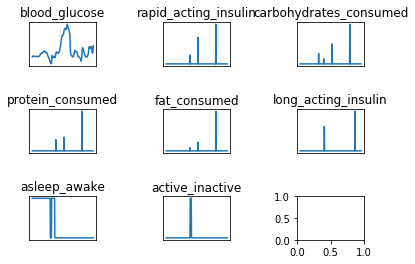

In [12]:
#Setting the data ready for supervised modelling
groups = [0, 1, 2, 3, 4, 5, 6, 7]
values = data.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(data.columns[i])

In [13]:
#Normalising the data into range between 0 and 1 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([0.17687075, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [14]:
scaled

array([[0.17687075, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19047619, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19727891, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.27210884, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36734694, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45578231, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data

In [39]:
pd.set_option('display.max_columns', None)
import numpy as np 
timeSteps = 6 #Predicting 30 mins in future 

supervised = to_supervised(scaled,lag=timeSteps)
pd.DataFrame(supervised)

0    1    2    3    4    5    6    7         8    9    10   11  \
0    0.176871  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
1    0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.197279  0.0  0.0  0.0   
2    0.197279  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.197279  0.0  0.0  0.0   
3    0.197279  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.197279  0.0  0.0  0.0   
4    0.197279  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.197279  0.0  0.0  0.0   
5    0.197279  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
6    0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
7    0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
8    0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
9    0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
10   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
11   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
12   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
13   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
14   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
15   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
16   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
17   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
18   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
19   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
20   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
21   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.190476  0.0  0.0  0.0   
22   0.190476  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
23   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
24   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
25   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
26   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
27   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
28   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
29   0.183673  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.183673  0.0  0.0  0.0   
..        ...  ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...   
252  0.170068  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.170068  0.0  0.0  0.0   
253  0.170068  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.170068  0.0  0.0  0.0   
254  0.170068  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.170068  0.0  0.0  0.0   
255  0.170068  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.176871  0.0  0.0  0.0   
256  0.176871  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.176871  0.0  0.0  0.0   
257  0.176871  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.183673  0.0  0.0  0.0   
258  0.183673  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.197279  0.0  0.0  0.0   
259  0.197279  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.204082  0.0  0.0  0.0   
260  0.204082  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.204082  0.0  0.0  0.0   
261  0.204082  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.224490  0.0  0.0  0.0   
262  0.224490  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.244898  0.0  0.0  0.0   
263  0.244898  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.265306  0.0  0.0  0.0   
264  0.265306  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.312925  0.0  0.0  0.0   
265  0.312925  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.353741  0.0  0.0  0.0   
266  0.353741  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.421769  0.0  0.0  0.0   
267  0.421769  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.428571  0.0  0.0  0.0   
268  0.428571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.428571  0.0  0.0  0.0   
269  0.428571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.435374  0.0  0.0  0.0   
270  0.435374  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.421769  0.0  0.0  0.0   
271  0.421769  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.401361  0.0  0.0  0.0   
272  0.

In [17]:
# spiltting the data into inputs and corresponding outputs to see if the model could predict
features = data.shape[1]
X = supervised[:,:features*timeSteps]
y = supervised[:,features*timeSteps]

In [18]:
X

array([[0.17687075, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19047619, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19727891, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.43537415, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39455782, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34693878, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
y

array([0.19047619, 0.19047619, 0.19047619, 0.19047619, 0.19047619,
       0.19047619, 0.18367347, 0.18367347, 0.18367347, 0.18367347,
       0.18367347, 0.19047619, 0.19047619, 0.19047619, 0.19047619,
       0.19047619, 0.19047619, 0.18367347, 0.18367347, 0.18367347,
       0.18367347, 0.18367347, 0.18367347, 0.18367347, 0.18367347,
       0.19047619, 0.19047619, 0.19727891, 0.20408163, 0.21088435,
       0.21768707, 0.23129252, 0.23809524, 0.25170068, 0.2585034 ,
       0.26530612, 0.27210884, 0.27210884, 0.26530612, 0.26530612,
       0.26530612, 0.27210884, 0.27210884, 0.28571429, 0.29251701,
       0.30612245, 0.31292517, 0.31292517, 0.31972789, 0.31972789,
       0.32653061, 0.32653061, 0.31972789, 0.31292517, 0.30612245,
       0.29931973, 0.29251701, 0.28571429, 0.28571429, 0.29251701,
       0.29251701, 0.28571429, 0.27891156, 0.27210884, 0.25170068,
       0.23809524, 0.21768707, 0.20408163, 0.19727891, 0.18367347,
       0.17006803, 0.16326531, 0.14965986, 0.13605442, 0.11564

In [20]:
X.shape

(282, 48)

In [21]:
y.shape

(282,)

In [22]:
clf

SVR(C=1.5, cache_size=1000, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [23]:
#Using previously trained SVR model to predict 30 mins in future 
y_pred = clf.predict(X)

In [24]:
y_pred

array([0.19945071, 0.18984814, 0.19129214, 0.19222779, 0.19233213,
       0.19229306, 0.19244085, 0.18309898, 0.18469169, 0.1856287 ,
       0.18573454, 0.18569647, 0.19518445, 0.19359251, 0.19265575,
       0.19255051, 0.19258917, 0.19244085, 0.18309898, 0.18469169,
       0.1856287 , 0.18573454, 0.18569647, 0.18584487, 0.18584487,
       0.18584487, 0.19518445, 0.19359251, 0.20199801, 0.20964719,
       0.21650929, 0.22308707, 0.23921616, 0.24426647, 0.25934932,
       0.26432759, 0.27011647, 0.27655807, 0.27391221, 0.26328251,
       0.26468384, 0.26551146, 0.27483823, 0.27320417, 0.29118972,
       0.29731901, 0.31272186, 0.31771795, 0.31432357, 0.32240626,
       0.32070907, 0.3289633 , 0.32716233, 0.31690744, 0.30887214,
       0.3020248 , 0.29506613, 0.28819868, 0.28147693, 0.28414894,
       0.2946278 , 0.2932186 , 0.28300331, 0.27525651, 0.2684246 ,
       0.24272706, 0.22969203, 0.20770743, 0.19597731, 0.19279058,
       0.17818571, 0.16399076, 0.16018358, 0.14546836, 0.13125

In [25]:
y_pred = y_pred.reshape(-1,1)

In [26]:
y_pred

array([[0.19945071],
       [0.18984814],
       [0.19129214],
       [0.19222779],
       [0.19233213],
       [0.19229306],
       [0.19244085],
       [0.18309898],
       [0.18469169],
       [0.1856287 ],
       [0.18573454],
       [0.18569647],
       [0.19518445],
       [0.19359251],
       [0.19265575],
       [0.19255051],
       [0.19258917],
       [0.19244085],
       [0.18309898],
       [0.18469169],
       [0.1856287 ],
       [0.18573454],
       [0.18569647],
       [0.18584487],
       [0.18584487],
       [0.18584487],
       [0.19518445],
       [0.19359251],
       [0.20199801],
       [0.20964719],
       [0.21650929],
       [0.22308707],
       [0.23921616],
       [0.24426647],
       [0.25934932],
       [0.26432759],
       [0.27011647],
       [0.27655807],
       [0.27391221],
       [0.26328251],
       [0.26468384],
       [0.26551146],
       [0.27483823],
       [0.27320417],
       [0.29118972],
       [0.29731901],
       [0.31272186],
       [0.317

In [27]:
X

array([[0.17687075, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19047619, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19727891, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.43537415, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39455782, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34693878, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
#Reshaping and scaling the data back to original range 
inv_new = np.concatenate( (y_pred, X[:,-7:] ) , axis =1)
inv_new = scaler.inverse_transform(inv_new)
final_pred = inv_new[:,0]

y = y.reshape( len(y), 1)

inv_new = np.concatenate( (y, X[:,-7:] ) ,axis = 1)
inv_new = scaler.inverse_transform(inv_new)
actual_pred = inv_new[:,0]

In [29]:
final_pred

array([ 6.13192546,  5.99076767,  6.01199448,  6.02574858,  6.02728235,
        6.02670791,  6.02888051,  5.89155497,  5.91496787,  5.92874186,
        5.93029779,  5.92973817,  6.06921148,  6.04580991,  6.03203948,
        6.03049256,  6.0310608 ,  6.02888051,  5.89155497,  5.91496787,
        5.92874186,  5.93029779,  5.92973817,  5.93191956,  5.93191956,
        5.93191956,  6.06921148,  6.04580991,  6.16937077,  6.28181364,
        6.38268661,  6.47937996,  6.71647748,  6.79071713,  7.01243495,
        7.0856156 ,  7.17071218,  7.26540364,  7.22650952,  7.07025287,
        7.09085252,  7.1030184 ,  7.240122  ,  7.21610128,  7.48048887,
        7.57058952,  7.79701132,  7.87045394,  7.8205565 ,  7.93937206,
        7.91442326,  8.03576055,  8.0092862 ,  7.85853934,  7.74042047,
        7.63976449,  7.53747211,  7.43652062,  7.33771085,  7.37698948,
        7.5310287 ,  7.51031346,  7.36014863,  7.24627069,  7.14584166,
        6.76808777,  6.57647279,  6.2532992 ,  6.08086653,  6.03

In [30]:
final_pred = np.round_(final_pred, decimals=1, out = None)

In [31]:
actual_pred

array([ 6. ,  6. ,  6. ,  6. ,  6. ,  6. ,  5.9,  5.9,  5.9,  5.9,  5.9,
        6. ,  6. ,  6. ,  6. ,  6. ,  6. ,  5.9,  5.9,  5.9,  5.9,  5.9,
        5.9,  5.9,  5.9,  6. ,  6. ,  6.1,  6.2,  6.3,  6.4,  6.6,  6.7,
        6.9,  7. ,  7.1,  7.2,  7.2,  7.1,  7.1,  7.1,  7.2,  7.2,  7.4,
        7.5,  7.7,  7.8,  7.8,  7.9,  7.9,  8. ,  8. ,  7.9,  7.8,  7.7,
        7.6,  7.5,  7.4,  7.4,  7.5,  7.5,  7.4,  7.3,  7.2,  6.9,  6.7,
        6.4,  6.2,  6.1,  5.9,  5.7,  5.6,  5.4,  5.2,  4.9,  4.7,  4.4,
        4.2,  3.9,  3.8,  3.7,  3.6,  3.5,  3.3,  3.2,  4.2,  5.3,  6.3,
        6.1,  5.8,  5.6,  5.6,  5.5,  5.5,  5.6,  5.8,  5.9,  5.9,  6. ,
        6. ,  5.9,  5.7,  5.6,  6.1,  6.7,  7.3,  7.4,  7.6,  7.7,  7.6,
        7.5,  7.4,  7.3,  7.3,  7.2,  7.2,  7.1,  7.1,  7.3,  7.4,  7.6,
        7.7,  7.8,  8.2,  8.5,  8.9,  9.2,  9.8, 10.5, 11.1, 11.8, 12.4,
       13.1, 13.3, 13.5, 13.7, 13.7, 13.8, 13.8, 14. , 14.1, 14.3, 14.8,
       15.2, 15.7, 15.9, 16.2, 16.4, 16.4, 16.3, 16

In [32]:
bg_pred = pd.DataFrame(final_pred)
bg_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 1 columns):
0    282 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [33]:
bg_actual = pd.DataFrame(actual_pred)
bg_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 1 columns):
0    282 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [34]:
bg_actual

0
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
6    5.9
7    5.9
8    5.9
9    5.9
10   5.9
11   6.0
12   6.0
13   6.0
14   6.0
15   6.0
16   6.0
17   5.9
18   5.9
19   5.9
20   5.9
21   5.9
22   5.9
23   5.9
24   5.9
25   6.0
26   6.0
27   6.1
28   6.2
29   6.3
..   ...
252  5.9
253  6.1
254  6.2
255  6.2
256  6.5
257  6.8
258  7.1
259  7.8
260  8.4
261  9.4
262  9.5
263  9.5
264  9.6
265  9.4
266  9.1
267  8.9
268  9.1
269  9.2
270  9.4
271  9.5
272  9.5
273  9.6
274  9.0
275  8.3
276  7.7
277  7.3
278  7.2
279  7.2
280  8.6
281  9.9

[282 rows x 1 columns]

In [35]:
bg_pred

0
0    6.1
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
6    6.0
7    5.9
8    5.9
9    5.9
10   5.9
11   5.9
12   6.1
13   6.0
14   6.0
15   6.0
16   6.0
17   6.0
18   5.9
19   5.9
20   5.9
21   5.9
22   5.9
23   5.9
24   5.9
25   5.9
26   6.1
27   6.0
28   6.2
29   6.3
..   ...
252  5.9
253  6.0
254  6.3
255  6.3
256  6.3
257  6.6
258  7.0
259  7.3
260  8.1
261  8.8
262  9.9
263  9.7
264  9.5
265  9.6
266  9.3
267  8.9
268  8.8
269  9.1
270  9.2
271  9.5
272  9.6
273  9.5
274  9.6
275  8.8
276  7.9
277  7.3
278  7.0
279  7.1
280  7.2
281  9.2

[282 rows x 1 columns]

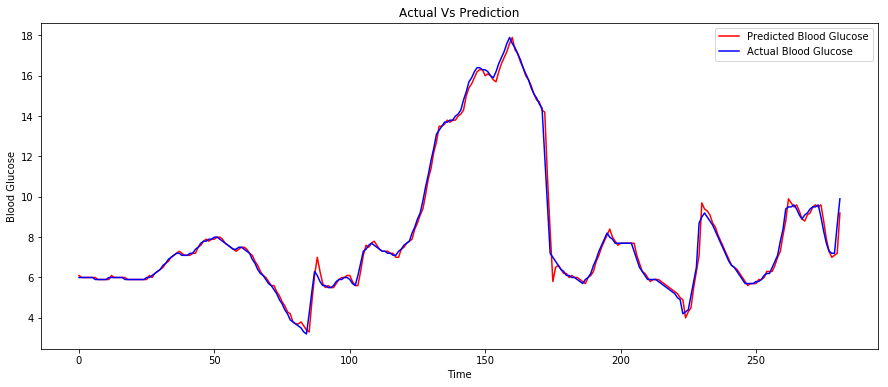

In [36]:
# Visualising the results
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(bg_pred, color = 'red', label = 'Predicted Blood Glucose')
plt.plot(bg_actual, color = 'blue', label = 'Actual Blood Glucose')
plt.title('Actual Vs Prediction')
plt.xlabel('Time')
plt.ylabel('Blood Glucose')
plt.legend()
plt.show()

In [37]:
##Using Test data - 5th Feb 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#calculate RMSE
rmse = sqrt(mean_squared_error(final_pred, actual_pred))
print('Test RMSE: %.4f' % rmse)

Test RMSE: 0.3032
